<a href="https://colab.research.google.com/github/aparna-2001/Leukemia_GenePatterns/blob/main/dataset_leukemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is my project aim?**

- To analyse the gene expression data and identify patterns that distinguish ALL(Acute Lyphoid Leukemia) and AML(Acute myeloid leukemia)using matrix methods, PCA, ANOVA, Linear regression, graph analysis in python.

In [29]:
#pipleine for analysis
   #file handling
   #Data structuring
   #Data cleaning and pre processing
   #Exploratory data analysis
   #PCA
   #ANOVA
   #linear regression
   #Graph analysis
   #interpretation
   #visualisation

In [30]:
#converting the data file to table and then to matrix


import zipfile
import pandas as pd
import numpy as np

with zipfile.ZipFile("archive.zip",'r') as zf:
  with zf.open("data_set_ALL_AML_independent.csv") as file:
    data_table = pd.read_csv(file)

#data_matrix = np.array(data_table)

print(data_table.head())
#print(data_matrix)
#print(data_matrix.shape)




                      Gene Description Gene Accession Number   39 call   40  \
0  AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at -342    A  -87   
1  AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at -200    A -248   
2  AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at   41    A  262   
3  AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at  328    A  295   
4  AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at -224    A -226   

  call.1   42 call.2   47 call.3  ...   65 call.29   66 call.30   63 call.31  \
0      A   22      A -243      A  ...  -62       A  -58       A -161       A   
1      A -153      A -218      A  ... -198       A -217       A -215       A   
2      A   17      A -163      A  ...   -5       A   63       A  -46       A   
3      A  276      A  182      A  ...  141       A   95       A  146       A   
4      A -211      A -289      A  ... -256       A -191       A -172       A   

    64 call.32   62 call.33  
0  -48       A

In [31]:
#filtering the columns which only contains numeric values

numeric_cols = data_table.select_dtypes(include="number").columns
#print(numeric_cols)

#creating new table with only numeric data
data_numeric = data_table[numeric_cols]
#print(data_numeric)

data_numeric_matrix = np.array(data_numeric)

##checking the data
print(data_numeric.head())
#print(data_numeric_matrix.shape)
#print(data_numeric.describe())

#mean




    39   40   42   47   48   49   41   43   44   45  ...   54   57   58   60  \
0 -342  -87   22 -243 -130 -256  -62   86 -146 -187  ...  -90 -137 -157 -172   
1 -200 -248 -153 -218 -177 -249  -23  -36  -74 -187  ...  -87  -51 -370 -122   
2   41  262   17 -163  -28 -410   -7 -141  170  312  ...  102  -82  -77   38   
3  328  295  276  182  266   24  142  252  174  142  ...  319  178  340   31   
4 -224 -226 -211 -289 -170 -535 -233 -201  -32  114  ... -283 -135 -438 -201   

    61   65   66   63   64   62  
0  -47  -62  -58 -161  -48 -176  
1 -442 -198 -217 -215 -531 -284  
2  -21   -5   63  -46 -124  -81  
3  396  141   95  146  431    9  
4 -351 -256 -191 -172 -496 -294  

[5 rows x 34 columns]


In [32]:
# checking for missing values

print(data_numeric.isnull().values.any())
print(data_numeric.isnull().sum())

False
39    0
40    0
42    0
47    0
48    0
49    0
41    0
43    0
44    0
45    0
46    0
70    0
71    0
72    0
68    0
69    0
67    0
55    0
56    0
59    0
52    0
53    0
51    0
50    0
54    0
57    0
58    0
60    0
61    0
65    0
66    0
63    0
64    0
62    0
dtype: int64


- since there are no missing values wecan proceed further with statistical analysis

In [33]:
#just checking for the type

print(type(data_numeric))
print(type(data_numeric_matrix))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [34]:
#basic statistics of the data

#print(data_numeric.describe())


#mean across the data
gene_mean = data_numeric.mean(axis = 1)
#print(gene_mean)
avg_mean = gene_mean.mean() #avg expression of one gene across all data
print(f"The average mean: {avg_mean}")


#variation across the data
gene_std_dev = data_numeric.std(axis = 1)
avg_std_dev = gene_std_dev.mean()
print(f"The average standard deviation: {avg_std_dev}")

#using median per patient
#print(data_numeric.shape)

The average mean: 599.7512686376276
The average standard deviation: 394.2302581419117


- The average mean of the data set is approximately 599.75,
    - which mean the mean value of gene expression of all genes in patient is around 599.79

- The standard deviation for the gene expression across all patients is 394.23.
   -This high variation suggests that some genes are highly expressed while others are lowly expressed, which is typical in gene expression datasets.


caution: This value can only help you in gene expression studies. But this won't give you an absolute picture. because the data values strtches to both extremes(high negative to high positive)

In [35]:
#checking wether data is log transformed

print(data_numeric_matrix.max())
print(data_numeric_matrix.min())

71369
-26775


**Let's standardise the data**



*   standardising the data means checking wether they are in the most suitable form for analysis. especially statistical analysis

*   standardising to z score, that is mean 0, standard devation 1



*  before that let's check wether our data is log transformed.
   - usually log transformed data range from -3 to 15




In [36]:
#Let's do the log transformation of data

data_numeric_matrix_log = np.log2(data_numeric_matrix)
#print(data_numeric_matrix_log)

#Here some of the values cannot be log transformed because,
   #they are either 0 or large negative
#so we need to make the values positive

min_value = np.min(data_numeric_matrix)
data_shifting = data_numeric_matrix - min_value + 1
#print(data_shifting.min())
#print(data_shifting.max())


data_numeric_matrix_log = np.log2(data_shifting)
print(data_numeric_matrix_log.max())
print(data_numeric_matrix_log.min())

#now let's convert everything to z score
mean_gene = data_numeric_matrix_log.mean(axis=1)
std_dev_gene = data_numeric_matrix_log.std(axis=1)
# Reshape mean_gene and std_dev_gene to (7129, 1) for correct broadcasting
data_numeric_matrix_z = (data_numeric_matrix_log - mean_gene[:, np.newaxis]) / std_dev_gene[:, np.newaxis]
print(data_numeric_matrix_z)

#now let's use this data for PCA, ANOVA, REGRESSION

16.582627150970424
0.0
[[-2.85339853  0.25070589  1.56852032 ... -0.64702795  0.72283479
  -0.82930526]
 [-0.25455842 -0.67789491  0.15921833 ... -0.38676888 -3.18949448
  -0.99590026]
 [ 0.3079088   2.03482769  0.11951408 ... -0.3758261  -0.99072446
  -0.6515198 ]
 ...
 [ 0.90809588 -0.58598389  0.13395191 ... -0.01364172  0.02326082
   0.39213471]
 [-0.39504675 -0.8338873   3.40107655 ... -0.30376231 -0.14327296
   0.0621185 ]
 [-0.78406187  0.23027545 -0.20421289 ...  0.99497341 -0.84622461
  -0.57690319]]


/tmp/ipython-input-1609303857.py:3: RuntimeWarning: divide by zero encountered in log2
  data_numeric_matrix_log = np.log2(data_numeric_matrix)
/tmp/ipython-input-1609303857.py:3: RuntimeWarning: invalid value encountered in log2
  data_numeric_matrix_log = np.log2(data_numeric_matrix)


(34, 7129)
[0.17558848 0.26659389 0.3289657  0.38387852 0.4300433  0.47359627
 0.51002691 0.54402649 0.57569739 0.60654464 0.63455986 0.66065205
 0.68485243 0.70794511 0.7299004  0.75140087 0.77196273 0.79169474
 0.81076718 0.82932503 0.84655496 0.86339494 0.87937732 0.89480271
 0.90912702 0.92296107 0.93608015 0.94855864 0.96043194 0.97212196
 0.982117   0.99154298 1.         1.        ]


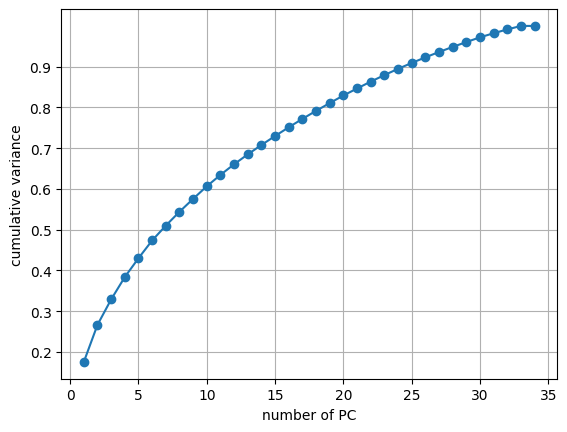

In [37]:
#1.Now let's do PCA.

   #PCA is the method of reducing dimensions
      #that is our aim here is to reduce the gene expressions number
           #we have 7129 genes across 34 patients after patients
               #we try to find the pattern by using lesser number of genes

#print(data_numeric_matrix_z.shape)

#Transpose of the the z-score matrix

data_numeric_matrix_z_T = data_numeric_matrix_z.T
print(data_numeric_matrix_z_T.shape)

#to find PCA, we will use SVD decomposition

U, S, VT = np.linalg.svd(data_numeric_matrix_z_T)

#print(f'SHAPE OF U: {U.shape}')
#print(f'SHAPE OF S: {S.shape}')
#print(f'SHAPE OF VT: {VT.shape}')

#finding PC
  #filtering the most informative gene

#Principal Components of samples = U @ Σ (rows = samples, columns = PCs)
#Loadings of genes on PCs = Vᵀ.T (shows which genes contribute to each PC)
#So Vᵀ tells you which genes are “driving” each PC, not just the PCs themselves.

principal_comp = U @ np.diag(S)
#print(principal_comp)

#taking the most informative columns
 #how many to take?
     #so we need to calculate the cumulative variance
        #cumulative variance accounting for around 80-90 percent is taken
variance = S**2 /np.sum(S**2)
cumulative_variance = np.cumsum(variance)
print(cumulative_variance)

no_of_pc = np.arange(1,len(cumulative_variance)+1)


import matplotlib.pyplot as plt
def draw_plot(x,y):
    plt.xlabel('number of PC')
    plt.ylabel('cumulative variance')
    plt.yticks(np.arange(0.1,1,0.1))
    plt.plot(x,y, marker='o')
    plt.grid(True)
    plt.show()

draw_plot(no_of_pc, cumulative_variance)

In [38]:
#from the above, we select 25 PCA's accounting for 90 percent variance
     # now each patient is represented by 25 numbers instead of approximately 7000 genes
      # now let's plot the PC's to identify which genes contributes most to the PCA

significant_PC = principal_comp[:,:25]
print(significant_PC.shape)

#from 25 PC's isolate only the PC1 and PC2

import matplotlib.pyplot as plt

def scatter_plot(x,y):
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.scatter(x,y,marker ='o')
  plt.show()

scatter_plot(significant_PC[:,0], significant_PC[:,1])
scatter_plot(significant_PC[:,2], significant_PC[:,3])


#heatmap
#def heatmap(data):




#If patients separate into clusters, they might represent disease subtypes or different biological states
#outliers = Could indicate: unusual patients, experimental errors, or biologically interesting cases
#spread: Wide spread = high variability
        #Tight cluster = similar patients




SyntaxError: incomplete input (ipython-input-188033835.py, line 33)

- from the above figure we can infer;
       - there are no meaningful clustering
       -

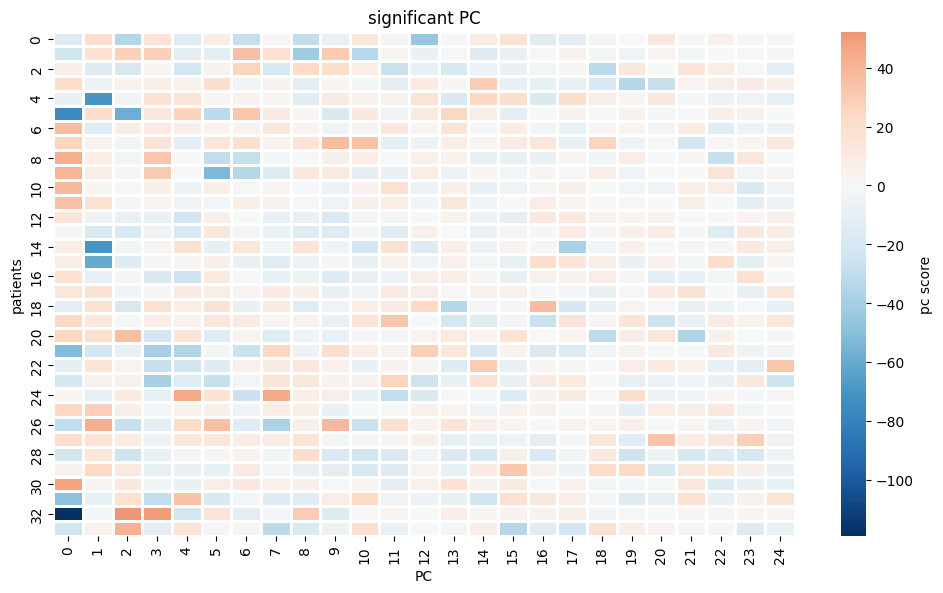

In [54]:
#from the above, we don't find any meaningful clustering
   #since we have only used PC1,PC2,PC3,PC4, we can't say there is no clustering at all
      #let's check all the PC's for cluster analysis


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.heatmap(significant_PC, cmap='RdBu_r',
            center = 0,
            linewidths= 1,
            cbar_kws = {'label':'pc score'}

            )

plt.title('significant PC')
plt.xlabel('PC')
plt.ylabel('patients')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()


In [ ]:
#from the heatmap we can assume that:
   #most PC's are very light. so they don't show any much variation
   #approxmately upto 7 or 10, PC's show a bit higher contrast
   #from patients side, patient 32 shows the least PC score with dark blue colour, thus may be an outlier

